<a href="https://colab.research.google.com/github/monickdallia/challenge-alura-store/blob/main/Challenge_AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)


In [ ]:
# Incluindo uma coluna identificando a loja
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Unindo todos os DataFrames
df = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Visualizando as primeiras linhas
df.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 9435 non-null   object 
 1   Categoria do Produto    9435 non-null   object 
 2   Preço                   9435 non-null   float64
 3   Frete                   9435 non-null   float64
 4   Data da Compra          9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Local da compra         9435 non-null   object 
 7   Avaliação da compra     9435 non-null   int64  
 8   Tipo de pagamento       9435 non-null   object 
 9   Quantidade de parcelas  9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Loja                    9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


#1. Análise do faturamento


In [ ]:
#faturamento total por loja
faturamento_por_loja = df.groupby('Loja')['Preço'].sum()
faturamento_por_loja.index.name = 'Faturamento Total'
print(faturamento_por_loja)

Faturamento Total
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


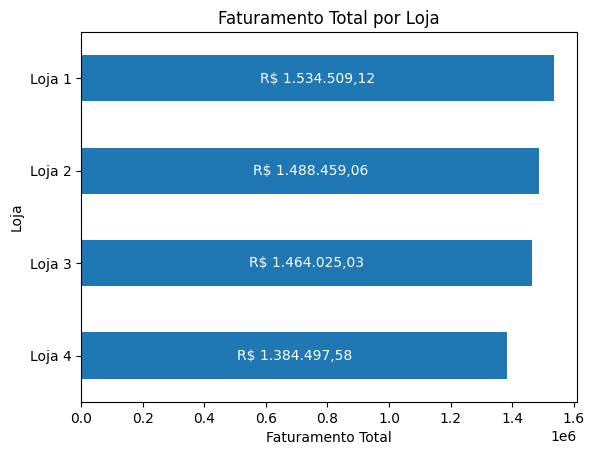

In [ ]:
#plotando o gráfico com o faturamento total por loja
faturamento_por_loja = faturamento_por_loja.sort_values(ascending=True)
ax = faturamento_por_loja.plot(kind='barh',
                          title='Faturamento Total por Loja',
                          xlabel='Faturamento Total',
                          ylabel='Loja',
                          legend=False,
                         )
#adicionando rótulos nas barras
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.') for x in container.datavalues],
        label_type='center',   # rótulo dentro da barra
        color='white'
    )
plt.show()

## Insights:
A Loja 1 é a líder de faturamento, com R$ 1.534.509,12.

A Loja 4 tem o menor faturamento, com R$ 1.384.497,58

A diferença de faturamento entre a melhor e a pior loja é de R$ 150 mil.

As lojas têm desempenho relativamente equilibrado, o que pode indicar boa padronização, mas também espaço para diferenciação.

# 2. Vendas por Categoria


In [ ]:
#calculando o total de vendas por categoria em cada loja
vendas_por_categoria_loja1 = loja1.groupby('Categoria do Produto')['Preço'].count()
vendas_por_categoria_loja2 = loja2.groupby('Categoria do Produto')['Preço'].count()
vendas_por_categoria_loja3 = loja3.groupby('Categoria do Produto')['Preço'].count()
vendas_por_categoria_loja4 = loja4.groupby('Categoria do Produto')['Preço'].count()

# Exibindo as vendas por categoria de cada loja
print("Vendas por categoria - Loja 1:\n", vendas_por_categoria_loja1)
print("\nVendas por categoria - Loja 2:\n", vendas_por_categoria_loja2)
print("\nVendas por categoria - Loja 3:\n", vendas_por_categoria_loja3)
print("\nVendas por categoria - Loja 4:\n", vendas_por_categoria_loja4)



Vendas por categoria - Loja 1:
 Categoria do Produto
brinquedos               324
eletrodomesticos         312
eletronicos              448
esporte e lazer          284
instrumentos musicais    182
livros                   173
moveis                   465
utilidades domesticas    171
Name: Preço, dtype: int64

Vendas por categoria - Loja 2:
 Categoria do Produto
brinquedos               313
eletrodomesticos         305
eletronicos              422
esporte e lazer          275
instrumentos musicais    224
livros                   197
moveis                   442
utilidades domesticas    181
Name: Preço, dtype: int64

Vendas por categoria - Loja 3:
 Categoria do Produto
brinquedos               315
eletrodomesticos         278
eletronicos              451
esporte e lazer          277
instrumentos musicais    177
livros                   185
moveis                   499
utilidades domesticas    177
Name: Preço, dtype: int64

Vendas por categoria - Loja 4:
 Categoria do Produto
brinquedos 

<Figure size 1200x1000 with 0 Axes>

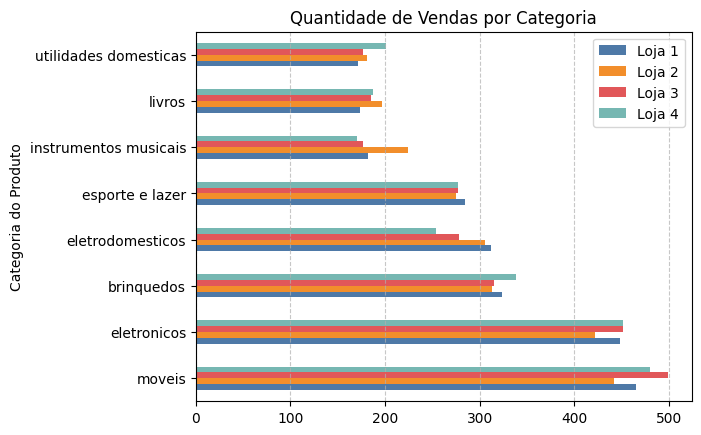

In [ ]:
#plotando gráfico de vendas por categoria em cada loja
qtde_por_categoria = pd.concat(
    [vendas_por_categoria_loja1, vendas_por_categoria_loja2,
     vendas_por_categoria_loja3, vendas_por_categoria_loja4],
    axis=1,
    keys=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
)
cores = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2']
qtde_por_categoria['Total Geral'] = qtde_por_categoria.sum(axis=1)
qtde_por_categoria = qtde_por_categoria.sort_values(by='Total Geral', ascending=False)
plt.figure(figsize=(12, 10))
ax = qtde_por_categoria.drop('Total Geral', axis=1).plot(kind='barh', color = cores, title='Quantidade de Vendas por Categoria', legend=True)
ax.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

## **Insights**

**Domínio das categorias-chave**

Loja 3 lidera em Móveis (499 vendas) e Eletrônicos (451), as duas categorias com maior volume total de vendas — sinal de alta eficiência nesses produtos de maior peso no faturamento.

**Ponto fraco nas categorias de maior faturamento**

Loja 2 fica atrás das outras em Móveis (442 vs. 465/480/499) e Eletrônicos (422 vs. 448/451/451), indicando baixa performance nos itens que mais contribuem para o faturamento.

**Especializações pontuais**

Loja 4 se destaca em Brinquedos (338) e Utilidades Domésticas (201), mas tem vendas menores em Eletrodomésticos (254) e Instrumentos Musicais (170).

**Operação estável**

Loja 1 apresenta números intermediários em todas as categorias, fica entre as demais em quase todas as métricas, o que aponta para uma operação consistente, sem diferenciais claros.



# 3. Média de Avaliação das Lojas

In [ ]:
#média de avaliação por loja
media_avaliacao_por_loja = df.groupby('Loja')['Avaliação da compra'].mean()
media_avaliacao_por_loja.index.name = 'Média de Avaliação'
print(media_avaliacao_por_loja)


Média de Avaliação
Loja 1    3.976685
Loja 2    4.037304
Loja 3    4.048326
Loja 4    3.995759
Name: Avaliação da compra, dtype: float64


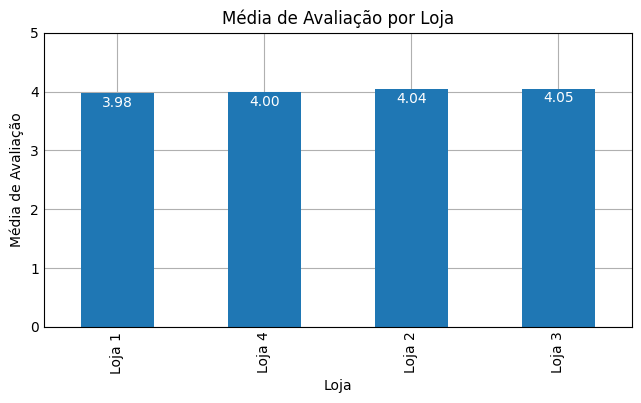

In [ ]:
#plotando gráfico com a avaliação média por loja
plt.figure(figsize=(6, 3))
media_avaliacao_por_loja = media_avaliacao_por_loja.sort_values(ascending=True)
ax = media_avaliacao_por_loja.plot(kind='bar',
    title='Média de Avaliação por Loja',
    xlabel='Loja',
    ylabel='Média de Avaliação',
    legend=False,
)
#adicionando rótulos nas barras
for container in ax.containers:
  ax.bar_label(
      container,
      labels=[f'{x:,.2f}' for x in container.datavalues],
      label_type='edge',
      padding=-12,
      color='white'
  )
ax.set_ylim(0, 5.0)
plt.show()




##Insights##
Todas as lojas têm boas avaliações.
As notas variam de 3.98 a 4.05, ou seja, todas as lojas têm avaliação próxima ou acima de 4, o que indica um bom nível de satisfação geral dos clientes.

A Loja 3 é a melhor avaliada (4.05).
Apesar da diferença ser pequena, a Loja 3 se destaca como a mais bem avaliada, o que pode indicar:

* Melhor atendimento

* Entregas mais rápidas

* Produtos de maior qualidade

* Pós-venda eficiente

A Loja 1 tem a menor média (3.98).
Ainda está dentro de um bom padrão, mas é a única loja abaixo de 4. Isso pode indicar pequenas falhas operacionais ou problemas pontuais que afetam a experiência do cliente.

# 4. Produtos Mais e Menos Vendidos por Loja

In [ ]:
#mais vendidos por loja
mais_vendidos = (
    df.groupby('Loja')['Produto']
    .value_counts()
    .rename('Quantidade')
    .reset_index()
    .sort_values(['Loja', 'Quantidade'], ascending=[True, False])
    .groupby('Loja')
    .head(3)
)
mais_vendidos['Tipo'] = 'Mais vendidos'

#menos vendidos por loja
menos_vendidos = (
    df.groupby('Loja')['Produto']
    .value_counts()
    .rename('Quantidade')
    .reset_index()
    .sort_values(['Loja', 'Quantidade'], ascending=[True, True])
    .groupby('Loja')
    .head(3)
)
menos_vendidos['Tipo'] = 'Menos vendidos'

# Unir os DataFrames
destaques_vendas = pd.concat([mais_vendidos, menos_vendidos])
for loja, grupo in destaques_vendas.groupby('Loja'):
    print(f"\n===== {loja} =====")
    print(grupo[['Produto', 'Quantidade', 'Tipo']])




===== Loja 1 =====
              Produto  Quantidade            Tipo
0       Guarda roupas          60   Mais vendidos
1         Micro-ondas          60   Mais vendidos
2       TV Led UHD 4K          60   Mais vendidos
49       Celular ABXY          33  Menos vendidos
50            Headset          33  Menos vendidos
48  Panela de pressão          35  Menos vendidos

===== Loja 2 =====
                      Produto  Quantidade            Tipo
51   Iniciando em programação          65   Mais vendidos
52                Micro-ondas          62   Mais vendidos
53                    Bateria          61   Mais vendidos
101         Jogo de tabuleiro          32  Menos vendidos
99                 Impressora          34  Menos vendidos
100            Mesa de jantar          34  Menos vendidos

===== Loja 3 =====
              Produto  Quantidade            Tipo
102     Kit banquetas          57   Mais vendidos
103         Cama king          56   Mais vendidos
104    Mesa de jantar          56 

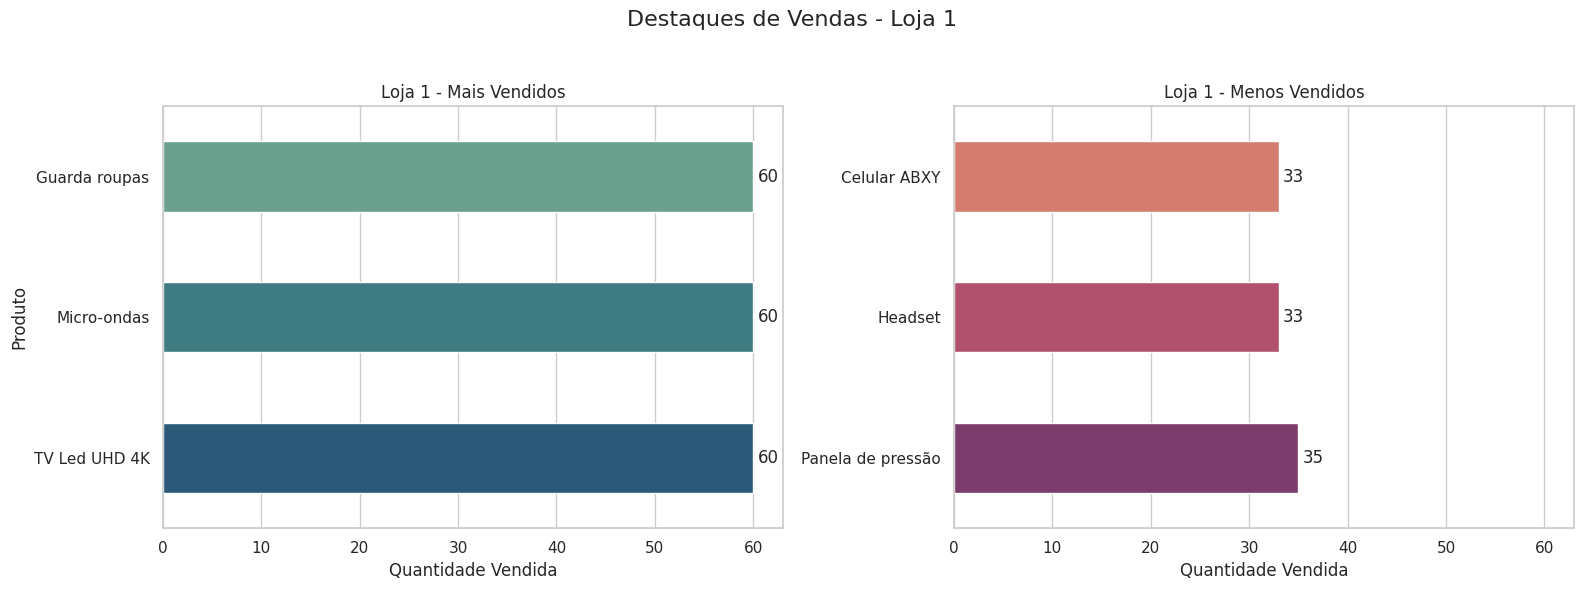

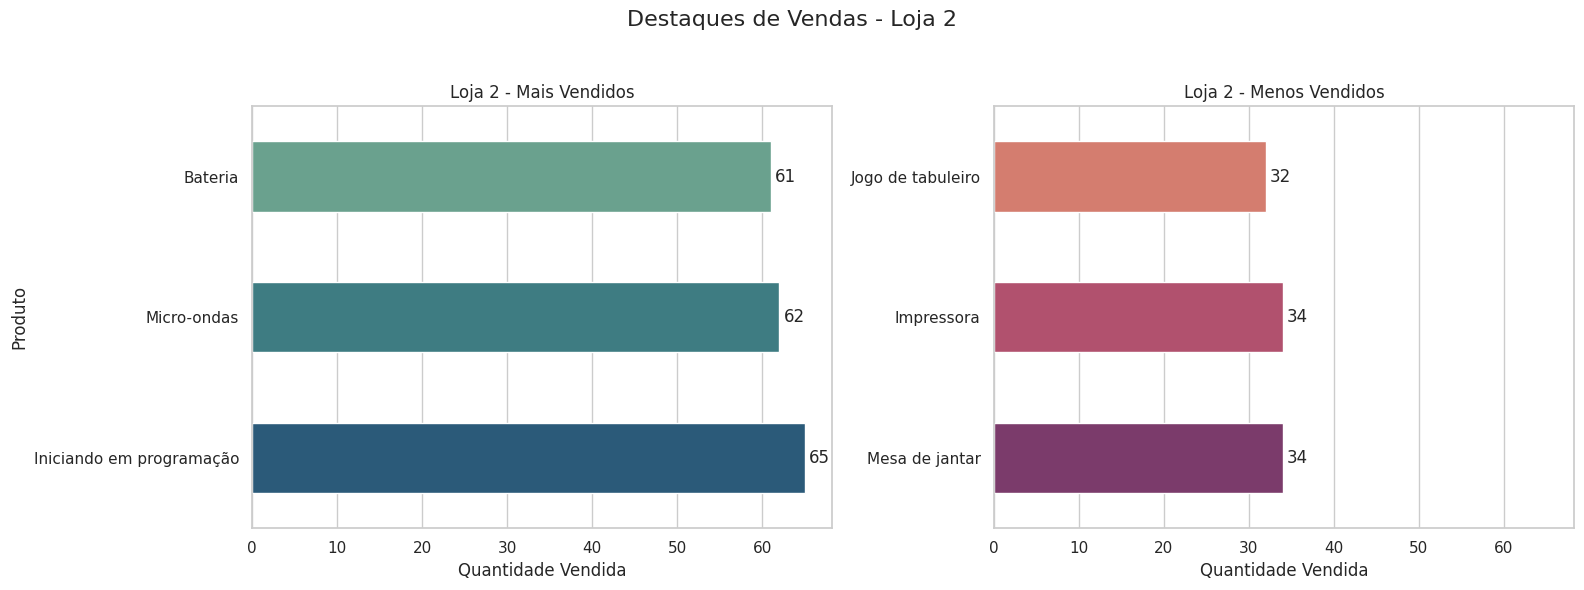

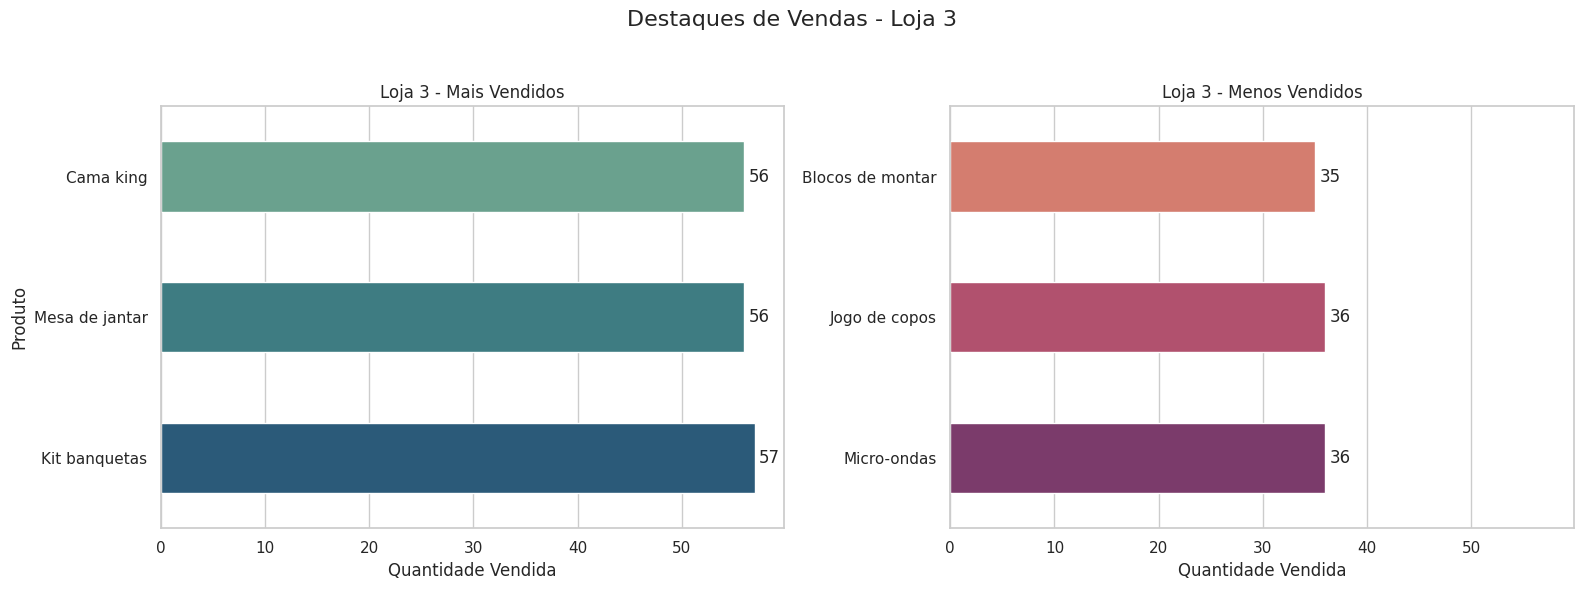

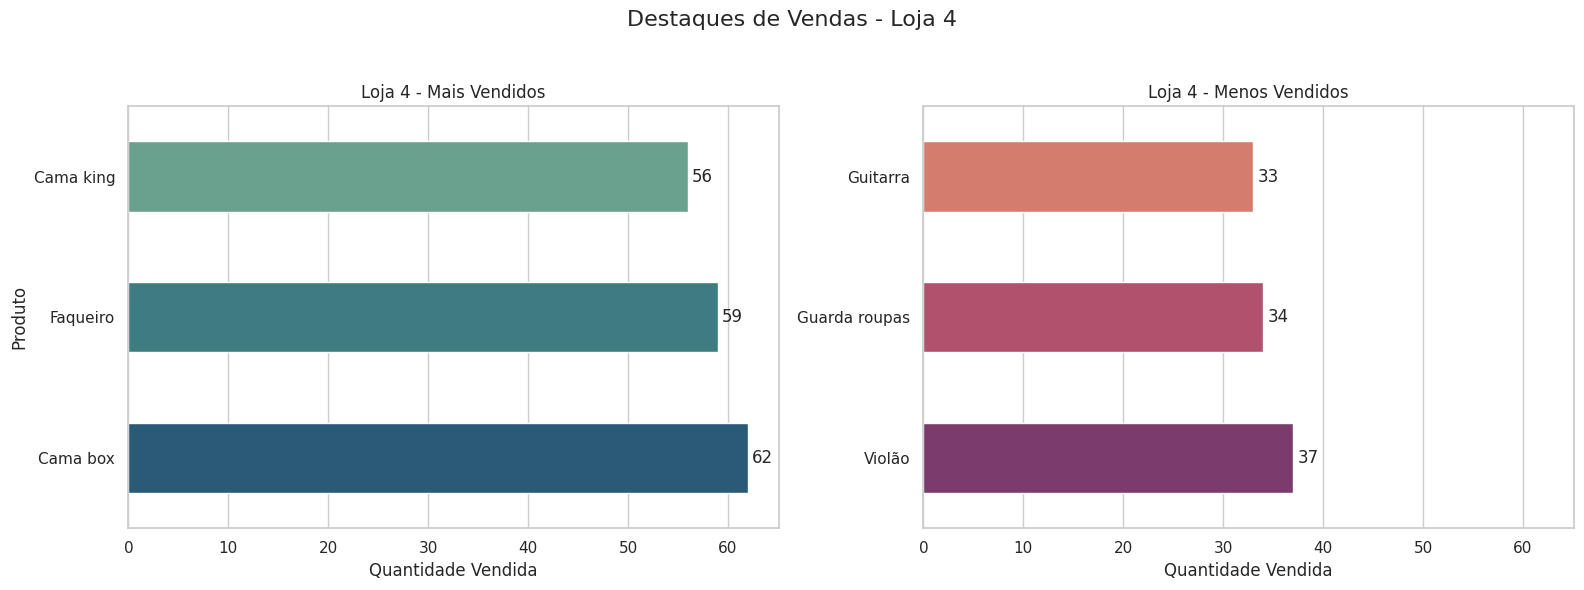

In [ ]:
#usando uma função para plotar os gráficos com os produtos mais e menos vendidos por loja

sns.set(style='whitegrid')
lojas = destaques_vendas['Loja'].unique()

for loja in lojas:
    dados_loja = destaques_vendas[destaques_vendas['Loja'] == loja]
    mais_vendidos = dados_loja[dados_loja['Tipo'] == 'Mais vendidos']
    menos_vendidos = dados_loja[dados_loja['Tipo'] == 'Menos vendidos']

    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

    #menos vendidos
    ax1 = sns.barplot(
        data=mais_vendidos.sort_values('Quantidade'),
        x='Quantidade', y='Produto',
        hue='Produto', ax=axes[0],
        palette='crest', width=0.5, legend=False
    )
    axes[0].set_title(f'{loja} - Mais Vendidos')
    axes[0].set_xlabel('Quantidade Vendida')
    axes[0].set_ylabel('Produto')

    #adiciona rótulos nas barras
    for container in ax1.containers:
        ax1.bar_label(container, padding=3)

    #menos vendidos
    ax2 = sns.barplot(
        data=menos_vendidos.sort_values('Quantidade'),
        x='Quantidade', y='Produto',
        hue='Produto', ax=axes[1],
        palette='flare', width=0.5, legend=False
    )
    axes[1].set_title(f'{loja} - Menos Vendidos')
    axes[1].set_xlabel('Quantidade Vendida')
    axes[1].set_ylabel('')

    #adiciona rótulos nas barras
    for container in ax2.containers:
        ax2.bar_label(container, padding=3)

    plt.suptitle(f'Destaques de Vendas - {loja}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()





##Insights##

Móveis (cama, mesa) - Top de vendas em diversas lojas

Eletrodomésticos - Micro-ondas varia conforme loja

Tecnologia pessoal - Baixa saída (headset, celular, impressora)

Lazer/Instrumentos - Baixa saída (violão, guitarra, jogos)

Livros/educação - Boa saída em loja com perfil tech/estudantil

# 5. Frete Médio por Loja


In [ ]:
#calculando frete médio por loja
frete_medio_por_loja = df.groupby('Loja')['Frete'].mean()
frete_medio_por_loja.index.name = 'Frete Médio'
print(frete_medio_por_loja)

Frete Médio
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997
Name: Frete, dtype: float64


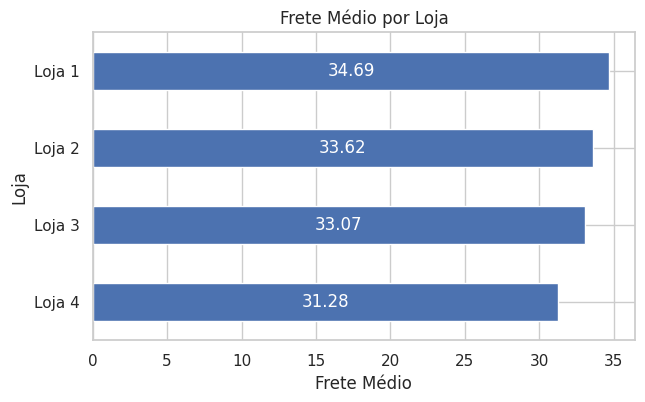

In [ ]:
#plotando gráfico com o preço médio do frete por loja
plt.figure(figsize=(7, 4))
frete_medio_por_loja = frete_medio_por_loja.sort_values(ascending=True)
ax = frete_medio_por_loja.plot(kind='barh',
    title='Frete Médio por Loja',
    xlabel='Frete Médio',
    ylabel='Loja',
    legend=False,
)

for container in ax.containers:
 ax.bar_label(
      container,
      labels=[f'{x:,.2f}' for x in container.datavalues],
      label_type='center',
      color='white'
 )


plt.show()

# 6. Análise de Desempenho Geográfico##

In [ ]:
import folium
from folium.plugins import HeatMap
# Agrupa o faturamento por loja e coordenada
agrupado = df.groupby(['Loja', 'lat', 'lon'])['Preço'].count().reset_index()

# Centraliza o mapa na média das coordenadas
center = [df['lat'].mean(), df['lon'].mean()]

for loja in agrupado['Loja'].unique():
    mapa = folium.Map(location=center, zoom_start=5)

    # Filtra os dados da loja
    dados_loja = agrupado[agrupado['Loja'] == loja]
    # Prepara os dados [lat, lon, peso]
    heat_data = dados_loja[['lat', 'lon', 'Preço']].values.tolist()

    HeatMap(heat_data, radius=15, max_zoom=13).add_to(mapa)
    print(f"Heatmap de vendas para {loja}:")
    display(mapa)



Heatmap de vendas para Loja 1:


Heatmap de vendas para Loja 2:


Heatmap de vendas para Loja 3:


Heatmap de vendas para Loja 4:


In [ ]:
# Centraliza o mapa na média das coordenadas
center = [df['lat'].mean(), df['lon'].mean()]
mapa = folium.Map(location=center, zoom_start=5)

# Para cada loja, cria uma camada de heatmap
for loja in df['Loja'].unique():
    dados_loja = df[df['Loja'] == loja]
    heat_data = dados_loja[['lat', 'lon', 'Preço']].dropna().values.tolist()
    heat_layer = HeatMap(
        heat_data,
        radius=15,
        max_zoom=13,
        name=f'Heatmap {loja}',
        show=True  # Deixe True para todas aparecerem ligadas ao abrir
    )
    heat_layer.add_to(mapa)

# Adiciona controle de camadas para ligar/desligar cada loja
folium.LayerControl().add_to(mapa)

# Exibe o mapa no notebook
mapa

# **Relatório Final**


---


**📋 Decisão Final**

Recomendação: com base em todas as análises feitas, recomendamos ao Sr. João a vender a Loja 4.

**✅ Justificativa**

É a que traz menor faturamento apesar de ter o frete mais competitivo.

Tem avaliação apenas mediana, enquanto as outras lojas equilibram bem receita, custo de frete e satisfação.

Desinvestir nela vai liberar recursos para fortalecer as unidades com melhor desempenho e gerar maior retorno.

---

**💰📈Proposta de Melhorias nas Lojas 1, 2 e 3**

**🏪 Loja 1**
* Negociar frete para reduzir custos e atrair pedidos menores.

* Criar campanhas de combos móveis + eletrônicos.

* Implementar programa de fidelidade para aumentar avaliações.

**🏪 Loja 2**
* Oferecer frete grátis ou reduzido para livros acima de certo valor.

* Lançar clube de assinatura de livros ou cursos.

* Ampliar parcerias com autores/editoras para promoções especiais.

**🏪 Loja 3**
* Criar combos de móveis com eletrodomésticos e oferecer frete grátis em compras maiores.

* Diversificar a linha de eletrodomésticos.

* Investir em atendimento personalizado para projetos de ambientes.

